In [19]:
import pandas as pd
kpc2cm, Myr2sec = 3.08567758e21, 31557600000000.

data = pd.read_csv('/data/a3data/pythia8157/main_antihelium/test_100GeV_bb_raklev12399_pbar', delimiter=' ', header=None, names=('E_CMS', 'A', 'Z','E_d','p_coal','method','weight'))
print data
data['E_d'] /= 2. # Divide by nucleon number (T/n)

      E_CMS  A  Z        E_d     p_coal  method  weight
0       200 -2 -1   3.416420   1.120120       1     0.2
1       200 -2 -1   0.340078   0.122032       0     1.0
2       200 -2 -1  15.505400   0.113796       0     1.0
3       200 -2  0   7.973830   0.098705       0     1.0
4       200 -2 -1        NaN   0.538483       1     0.2
5       200 -2 -2  14.329000   0.091008       0     1.0
6       200 -2 -1   2.441670   0.138724       0     1.0
7       200 -2 -1  16.297400   0.117840       0     1.0
8       200 -2  0   7.683680   0.070269       0     1.0
9       200 -2  0   6.004420   0.069659       0     1.0
10      200 -2 -1   0.375762   0.092183       0     1.0
11      200 -2  0   1.032470   0.114496       0     1.0
12      200 -2  0   0.458242   0.082977       0     1.0
13      200 -2 -2   0.313521   0.101334       0     1.0
14      200 -2 -2   6.132420   0.094263       0     1.0
15      200 -2 -1   6.564870   3.439310       1     0.2
16      200 -2 -1   0.336887   0.137871       0 

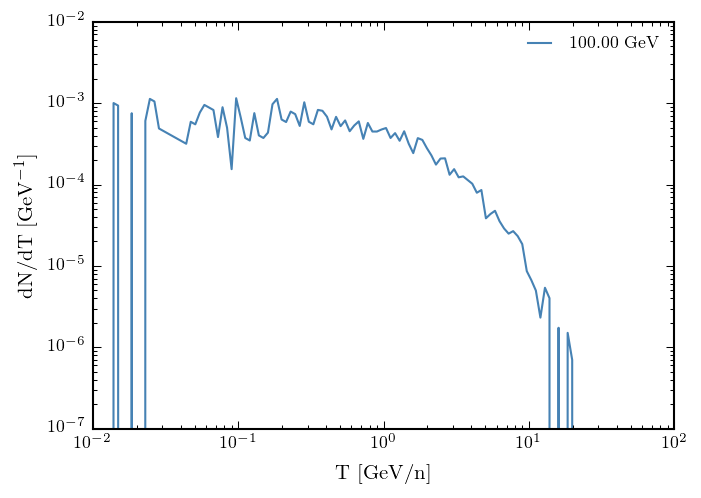

In [18]:
#dataset = data[(data['Z']==-1) & (data['method']==0)]
dataset = data[(data['method']==0)]

# Cross-sec method
num_events = 1e7
bins = np.logspace(-2,2,129)
val,bins = np.histogram(dataset['E_d'],bins=bins)
err = np.array([np.sqrt(val[i])/(bins[i+1]-bins[i]) for i in range(len(bins)-1)])/float(num_events*5)
val = np.array([val[i]/(bins[i+1]-bins[i]) for i in range(len(bins)-1)])
val = val/float(num_events)
bin_centers = np.array([.5*(bins[i+1]+bins[i]) for i in range(len(bins)-1)])


plt.plot(bin_centers, val , label='%1.2f GeV'%(dataset['E_CMS'].iat[0]/2.))


plt.yscale('log')
plt.xscale('log')
plt.ylabel('dN/dT [GeV$^{-1}$]')
plt.xlabel('T [GeV/n]')
#plt.ylim(1e-7,2e-4)
plt.legend(fontsize=8, frameon=False)
